# FIFA WORLD CUP (1930-2014) EDA

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [2]:
Matches= pd.read_csv("WorldCupMatches.csv")
Players= pd.read_csv('WorldCupPlayers.csv')
Cups= pd.read_csv('WorldCups.csv')

#### Getting a info of each data

In [3]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [4]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [5]:
Cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


#### Checking null values of each data

In [6]:
Matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [7]:
Players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [8]:
Cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

#### Checking Duplicates of each data

In [9]:
Matches.duplicated().sum()

3735

In [10]:
Players.duplicated().sum()

736

In [11]:
Cups.duplicated().sum()

0

#### Dropping the duplicates

In [12]:
Matches = Matches.drop_duplicates().dropna(how="all")
print (len(Matches))

836


In [13]:
Players = Players.drop_duplicates().dropna(how="all")
print (len(Players))

37048


In [14]:
Cups = Cups.drop_duplicates().dropna(how="all")
print (len(Cups))

20


#### Head of each Data

In [15]:
Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [16]:
Players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [17]:
Cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [18]:
Cups.Winner.unique()

array(['Uruguay', 'Italy', 'Germany FR', 'Brazil', 'England', 'Argentina',
       'France', 'Spain', 'Germany'], dtype=object)

### Problem Statement
#### Which country won the titles maximum times ?

In [19]:
Cups["Winner"]=Cups["Winner"].replace("Germany FR","Germany")

In [20]:
Win_By_country =Cups[['Winner','Year']].groupby([ 'Winner']).count()[['Year']].sort_values('Year',ascending=False)
Win_By_country

,Year
Winner,
Brazil,5
Germany,4
Italy,4
Argentina,2
Uruguay,2
England,1
France,1
Spain,1


<AxesSubplot:title={'center':' Titles Win by countries'}, xlabel='Winners', ylabel='Titles'>

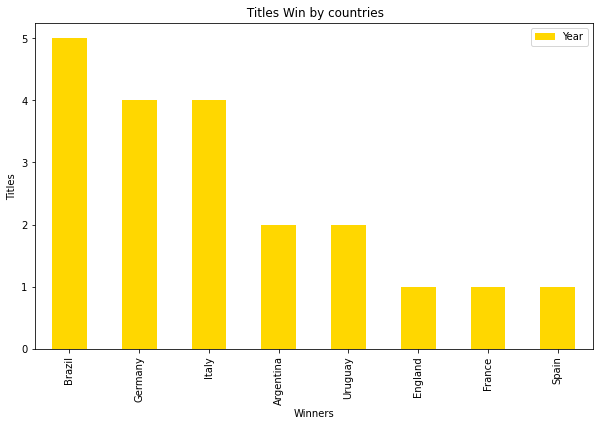

In [21]:
Win_By_country.plot(kind='bar',figsize = (10,6),title= " Titles Win by countries", xlabel = "Winners", ylabel = "Titles", grid = False,color = "Gold")


#### Brazil was won the 5 titles among the all countries.

### Problem Statement
#### What are year wise goal scored in each worldcup ?

In [22]:
Year_wise_goal = pd.pivot_table(Cups, index= "Year",values =["GoalsScored","MatchesPlayed"],aggfunc={"GoalsScored":'sum',"MatchesPlayed" : 'sum'}).sort_values('GoalsScored',ascending = False)
Year_wise_goal

,GoalsScored,MatchesPlayed
Year,,
2014,171,64
1998,171,64
2002,161,64
2006,147,64
1982,146,52
2010,145,64
1994,141,52
1954,140,26
1986,132,52


<AxesSubplot:title={'center':'Goal vs Matches Played'}, xlabel='Years', ylabel='Goal & Matches Played'>

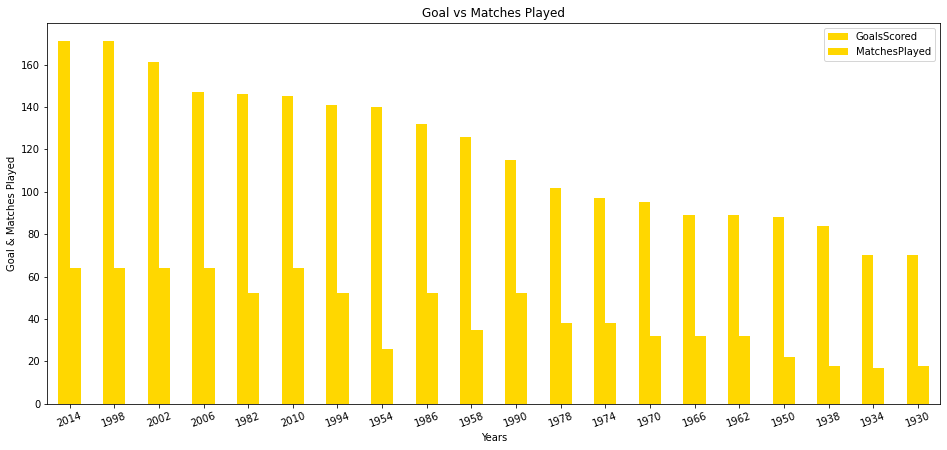

In [23]:
Year_wise_goal.plot(kind='bar',figsize = (16,7),title= "Goal vs Matches Played",xlabel = "Years",ylabel= "Goal & Matches Played", color= "Gold", rot = 20)

#### Among the all years 1998 and 2014 are the highest goal scored that are 171 each.

### Problem Statement
#### In which year the top and least attendace were recoreded  ?

In [24]:
Attendance_by_year = Matches[["Year","Attendance"]].groupby("Year").sum().sort_values("Attendance",ascending = False)
Attendance_by_year

,Attendance
Year,
1994.0,3587538.0
2014.0,3386810.0
2006.0,3359439.0
2010.0,3178856.0
1998.0,2785100.0
2002.0,2705197.0
1990.0,2516215.0
1986.0,2394031.0
1982.0,2109723.0


<AxesSubplot:title={'center':'Attendance throughout the years'}, xlabel='Years', ylabel='Attendance'>

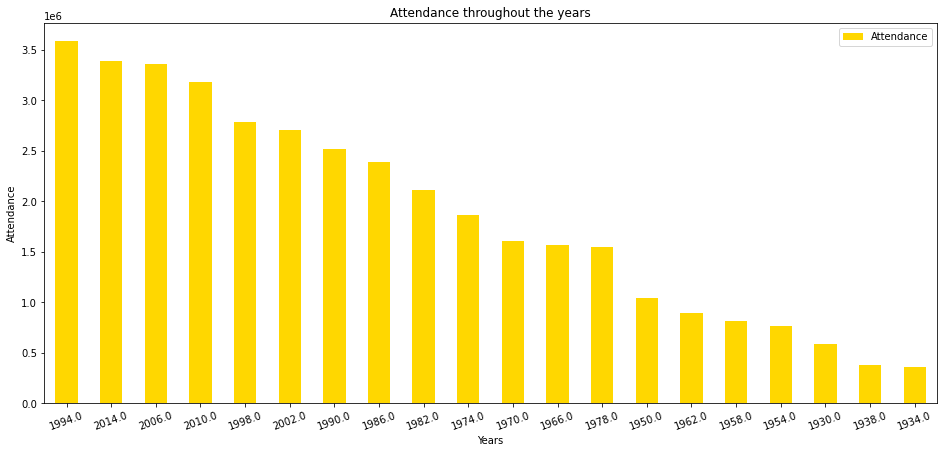

In [25]:
Attendance_by_year.plot(kind='bar',figsize = (16,7),title= "Attendance throughout the years",xlabel = "Years",ylabel= "Attendance", color= "Gold", rot = 20)

#### In the year of 1994 has recoreded highest attendance and the least were recorded in 1934.


### Problem Statement
#### Which city have highest attendance on average ?


In [26]:
City_attendance = Matches.groupby("City")["Attendance"].mean().reset_index().sort_values(by="Attendance",ascending=False)[:15]
City_attendance

,City,Attendance
79,Mexico City,93806.521739
67,Los Angeles,92600.875000
112,Rio De Janeiro,88848.666667
66,London,82369.600000
119,San Francisco,81737.333333
115,Saint-Denis,78222.222222
91,New York/New Jersey,73689.714286
7,Berlin,71500.000000
30,Detroit,70899.500000
55,Johannesburg,69580.133333


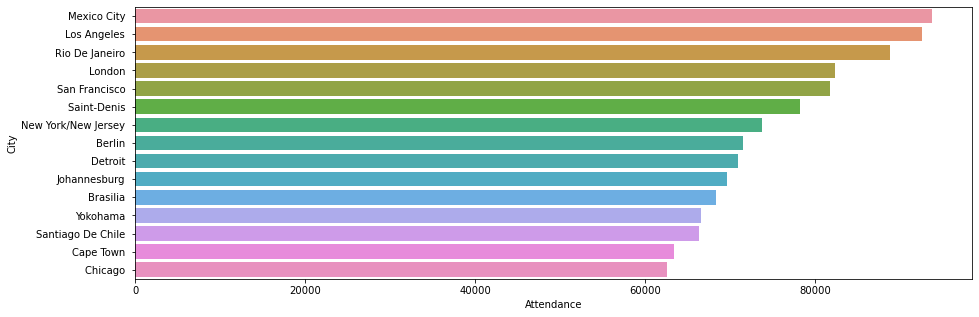

In [27]:
sns.barplot(x ="Attendance",y ="City", data=City_attendance, errwidth = 5).figure.set_size_inches(15,5)

#### Above visualization shows the Top 15 CIites which have highest Average Attendance
#### Across top 15 cities Mexico City has the highest average attendance .

### Problem Statement
#### Which team has the highest participations ? and give top 15 teams according to participations.

In [28]:
HT = Matches[["Year","Home Team Name"]]
HT.columns = ["year","team"]
HT["type"] = "HOME TEAM"
AT = Matches[["Year","Away Team Name"]]
AT.columns = ["year","team"]
AT["type"] = "AWAY TEAM"

home_away = pd.concat([HT,AT],axis=0)
Teams = home_away.groupby(["year","team"]).count().reset_index()
Teams= Teams["team"].value_counts().reset_index()[:15]
Teams

C:\Users\Ashitosh More\AppData\Local\Temp\ipykernel_9064\2175458462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HT["type"] = "HOME TEAM"
C:\Users\Ashitosh More\AppData\Local\Temp\ipykernel_9064\2175458462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AT["type"] = "AWAY TEAM"


,index,team
0,Brazil,20
1,Italy,18
2,Argentina,16
3,Mexico,15
4,England,14
5,France,14
6,Spain,14
7,Belgium,12
8,Uruguay,12
9,Sweden,11


#### Here are the top 15 teams according to participations.

<AxesSubplot:title={'center':'Most PArticipations As a Team'}, xlabel='Teams', ylabel='Participations'>

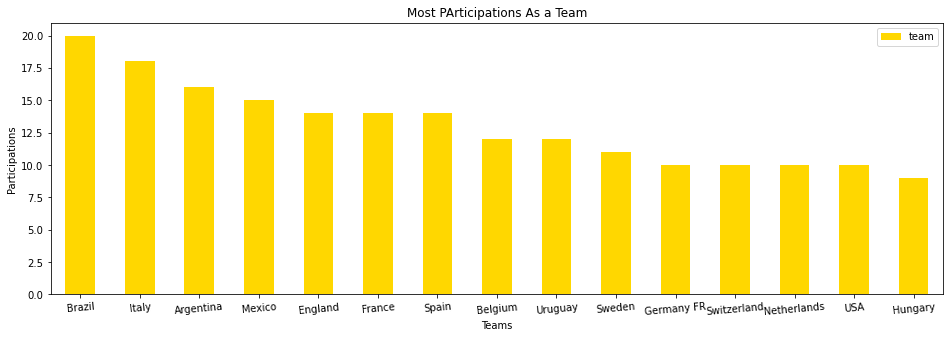

In [29]:
Teams.plot(kind='bar',x = "index",y= "team",figsize = (16,5),title= "Most PArticipations As a Team",xlabel = "Teams",ylabel= "Participations", color= "Gold", rot= 5)

#### Brazil has the highest participations across all teams which is 20.

### Problem Statement
#### Which Team has the highest number of goals scored from 1930 to 2014 ?

In [30]:
Matches["Home Team Name"]=Matches["Home Team Name"].replace("Germany FR","Germany")

In [31]:
Matches["Away Team Name"]=Matches["Away Team Name"].replace("Germany FR","Germany")

In [32]:
TT_GL_H= Matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
TT_GL_H.columns = ["team","goals"]

TT_GL_A = Matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
TT_GL_A.columns = ["team","goals"]

Total_goals = pd.concat([TT_GL_H,TT_GL_A],axis=0)
Total_goals= Total_goals.groupby("team")["goals"].sum().reset_index()
Total_goals = Total_goals.sort_values(by="goals",ascending =False)[:15]
Total_goals["goals"] = Total_goals["goals"].astype(int)
Total_goals

,team,goals
28,Germany,224
7,Brazil,221
2,Argentina,131
38,Italy,128
26,France,106
65,Spain,92
33,Hungary,87
46,Netherlands,86
73,Uruguay,80
25,England,79


C:\Users\Ashitosh More\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


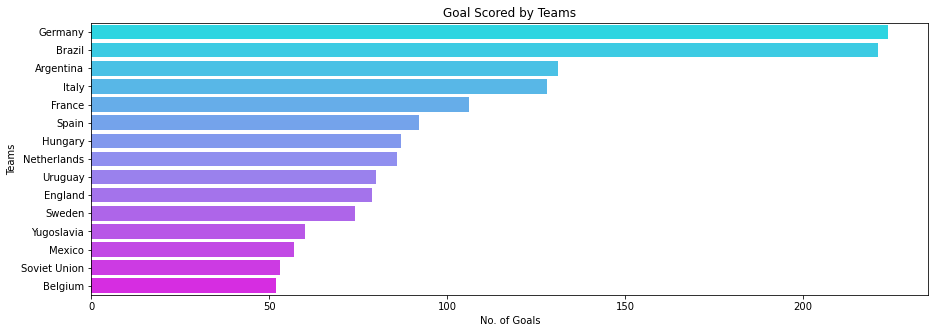

In [33]:
sns.barplot("goals","team",data=Total_goals,palette="cool",linewidth=3).figure.set_size_inches(15,5)
plt.xlabel("No. of Goals")
plt.ylabel("Teams")
plt.title("Goal Scored by Teams")
plt.show()

#### From 1930 to 2014 Germany has the highest no. of Goals ie. 224.

### Problem Statement
#### Which referee has the highest no. of appearance in world cup matches ?

In [34]:
Referee_c = Matches["Referee"].value_counts().reset_index().sort_values(by="Referee",ascending=False)[:15]
Referee_c

,index,Referee
0,Ravshan IRMATOV (UZB),9
2,QUINIOU Joel (FRA),8
3,ARCHUNDIA Benito (MEX),8
1,LARRIONDA Jorge (URU),8
4,DE BLEECKERE Frank (BEL),7
5,BUJSAIM Ali (UAE),7
6,RODRIGUEZ Marco (MEX),7
7,GRIFFITHS Benjamin (WAL),7
8,LANGENUS Jean (BEL),7
9,SIMON Carlos (BRA),7


C:\Users\Ashitosh More\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Referee with no. of Appearnaces')

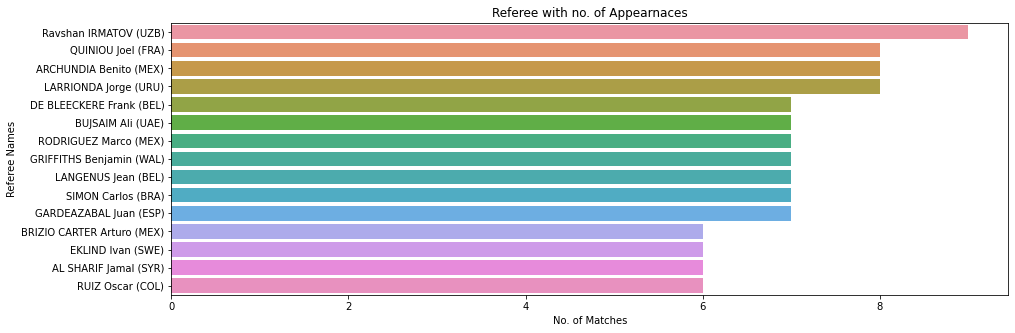

In [35]:
sns.barplot("Referee","index",data=Referee_c,linewidth=1).figure.set_size_inches(15,5)
plt.xlabel("No. of Matches")
plt.ylabel("Referee Names")
plt.title("Referee with no. of Appearnaces")

#### Ravshan IRMATOV has the highest appearance in world cup matches.

In [37]:
Matches.to_csv("Matches.csv")

In [38]:
Cups.to_csv("Cups.csv")

In [39]:
Players.to_csv("Players.csv")